<a href="https://colab.research.google.com/github/nikhomgithub/tfSciPy2018/blob/master/sentdex_con2d_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



1.14.0


In [3]:
mnist=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
img_size=28

cvt_train_images=train_images/255.0
cvt_test_images=test_images/255.0

cvt_train_images=np.array(train_images).reshape(-1,img_size,img_size,1)
cvt_test_images=np.array(test_images).reshape(-1,img_size,img_size,1)

In [32]:
print(cvt_train_images.shape)

(60000, 28, 28, 1)


In [39]:
print(cvt_test_images.shape)

(10000, 28, 28, 1)


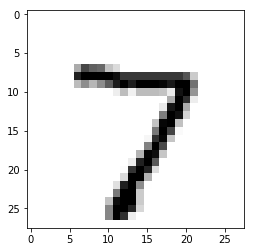

In [34]:
plt.imshow(test_images[0],cmap=plt.cm.binary)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


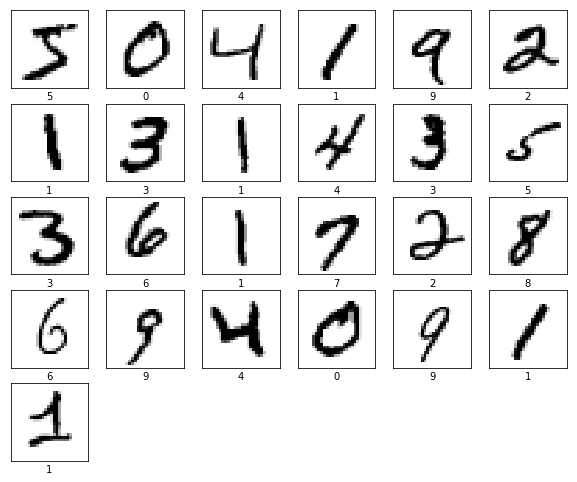

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

In [0]:
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
"""

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
model = keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu, input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D(2, 2),
    
    # This is the second convolution
    keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 12)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 12)        1308      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 12)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 300)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)             

In [45]:
model.fit(cvt_train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 162us/sample - loss: 1.0017 - acc: 0.8043
Epoch 2/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2347 - acc: 0.9276
Epoch 3/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1795 - acc: 0.9431
Epoch 4/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1491 - acc: 0.9542
Epoch 5/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1338 - acc: 0.9573


In [46]:
test_loss, test_acc = model.evaluate(cvt_test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 1s 82us/sample - loss: 0.0583 - acc: 0.9802
Test accuracy: 0.9802


In [0]:
predictions = model.predict(cvt_test_images)


Text(0.5, 0, '2')

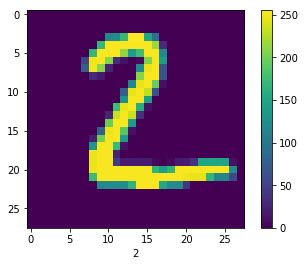

In [48]:
i=1
predictions[i]
plt.figure()
plt.imshow(test_images[i])
plt.colorbar()
plt.gca().grid(False)
plt.xlabel(test_labels[i])

In [0]:
model.save('mnist_model.model')

In [50]:
new_model=tf.keras.models.load_model('mnist_model.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
new_prediction=new_model.predict(cvt_test_images)

In [52]:
new_prediction.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
from google.colab import files
files.download('mnist_model.model') 

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mnist_model.model to mnist_model (1).model
User uploaded file "mnist_model.model" with length 1657088 bytes


In [53]:
model2 = keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu, input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D(2, 2),
    
    # This is the second convolution
    keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.summary()

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 12)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 12)        1308      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 12)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 300)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)             

In [54]:
model2.fit(cvt_train_images,train_labels,batch_size=32, epochs=5, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 9s 206us/sample - loss: 0.9459 - acc: 0.7985 - val_loss: 0.1583 - val_acc: 0.9518
Epoch 2/5
42000/42000 [==============================] - 8s 197us/sample - loss: 0.2689 - acc: 0.9174 - val_loss: 0.0965 - val_acc: 0.9708
Epoch 3/5
42000/42000 [==============================] - 8s 199us/sample - loss: 0.1939 - acc: 0.9404 - val_loss: 0.0814 - val_acc: 0.9751
Epoch 4/5
42000/42000 [==============================] - 8s 195us/sample - loss: 0.1671 - acc: 0.9484 - val_loss: 0.0866 - val_acc: 0.9729
Epoch 5/5
42000/42000 [==============================] - 8s 199us/sample - loss: 0.1470 - acc: 0.9541 - val_loss: 0.0682 - val_acc: 0.9799


In [0]:
prediction2=model2.predict([cvt_test_images])

In [57]:
print(prediction2.shape)

(10000, 10)


In [59]:
print(cvt_test_images.shape)

(10000, 28, 28, 1)


In [61]:
print(len(test_labels))

10000


In [0]:
result=prediction2.argmax(axis=1)

4


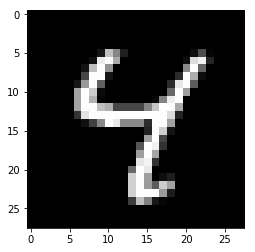

In [69]:
i=6
print(result[i])

plt.imshow(test_images[i],cmap="gray")
plt.show()